<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/LSTM_GRU_Next_Word_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 LSTM & GRU for Next Word Prediction
✅ Dataset Name: LSTM DATA.txt ✅ Goal: Predict the next word in a sentence using deep learning ✅ Approach: Build LSTM and GRU models using TensorFlow/Keras ✅ Evaluation: Accuracy, loss, perplexity, and model comparison

1️⃣ Setup & Import Libraries

💡 Explanation
✔ numpy → Handles numerical operations ✔ pandas → Helps load and process text dataset ✔ tensorflow & keras → Used for building LSTM & GRU models ✔ Tokenizer → Converts text into numerical format ✔ pad_sequences → Standardizes sequence length for training


In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
import matplotlib.pyplot as plt


2️⃣ Load & Explore the Dataset

💡 Explanation
✔ Loads raw text from LSTM DATA.txt ✔ Prints first 500 characters to inspect the dataset

In [13]:
# Load text dataset
with open("LSTM DATA.txt", "r", encoding="utf-8") as f:
    text_data = f.read()

# Print a small portion of the dataset
print(text_data[:500])  # Show the first 500 characters


﻿The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.



3️⃣ Data Preprocessing & Tokenization

Before training, we need to convert words into numerical tokens.

💡 Explanation
✔ Tokenizes words → Assigns each unique word a numeric ID ✔ Converts text into numerical format for deep learning ✔ Prints vocabulary size (number of unique words in the dataset)

In [14]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text_data])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences([text_data])[0]

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 7561


4️⃣ Generate Sequences for Training

We create sequences where each input predicts the next word.

💡 Explanation
✔ Creates input-output sequences for training ✔ Pads sequences so all input lengths are uniform ✔ Splits features (X) and target labels (y) ✔ One-hot encodes y (next word prediction output)


In [15]:
# Import necessary libraries
import numpy as np
import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example tokenized sequences (replace this with your actual sequences)
sequences = [
    [1, 2, 3],
    [4, 5, 6, 7],
    [8, 9, 10, 11, 12]
]  # Ensure your sequences are properly structured

# Generate input-output pairs
input_sequences = []
for seq in sequences:
    for i in range(1, len(seq)):  # Create increasing length sequences
        input_sequences.append(seq[:i+1])

# Ensure all sequences are lists (avoiding shape mismatch)
input_sequences = [list(seq) for seq in input_sequences]

# Check sequences before padding
print("Before padding:", input_sequences)
print("Lengths of sequences:", [len(seq) for seq in input_sequences])

# Pad sequences for equal length
max_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding="pre")

# Separate inputs (X) and outputs (y)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# Define vocab size based on maximum value in sequences
vocab_size = max(max(seq) for seq in sequences) + 1  # Adjust according to your dataset

# Convert y to categorical labels
y = keras.utils.to_categorical(y, num_classes=vocab_size)

print("Preprocessing completed successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)


Before padding: [[1, 2], [1, 2, 3], [4, 5], [4, 5, 6], [4, 5, 6, 7], [8, 9], [8, 9, 10], [8, 9, 10, 11], [8, 9, 10, 11, 12]]
Lengths of sequences: [2, 3, 2, 3, 4, 2, 3, 4, 5]
Preprocessing completed successfully!
X shape: (9, 4)
y shape: (9, 13)


5️⃣ Define LSTM Model Architecture

Now, we design our LSTM model.

💡 Explanation
✔ Embedding layer → Converts words into dense numerical representations for better learning ✔ LSTM layers → Capture long-term dependencies and context in sequences ✔ Dropout layer → Reduces overfitting by randomly deactivating neurons ✔ Dense output layer (softmax) → Predicts the next word by assigning probabilities

In [16]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

# Define LSTM model
model_lstm = Sequential([
    Embedding(vocab_size, 128, input_length=max_length-1),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dense(vocab_size, activation="softmax")
])

# Compile the model
model_lstm.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Display model summary
model_lstm.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

6️⃣ Define GRU Model Architecture

We build a similar model using GRU.

💡 Explanation
✔ Uses GRU layers instead of LSTM → More efficient with fewer parameters ✔ GRU is faster & performs well on smaller datasets → Ideal for real-time predictions ✔ Same loss function & optimizer → categorical_crossentropy + Adam for multi-class classification


In [17]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dropout, Dense

# Define GRU-based model
model_gru = Sequential([
    Embedding(vocab_size, 128, input_length=max_length-1),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100),
    Dense(vocab_size, activation="softmax")
])

# Compile the model
model_gru.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Display model summary
model_gru.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

7️⃣ Train LSTM & GRU Models

We now train both models.

💡 Explanation
✔ Trains both models for 30 epochs ✔ Uses batch size of 64 for efficient learning ✔ Validation split of 20% to monitor generalization

In [18]:
# Train LSTM Model
history_lstm = model_lstm.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)

# Train GRU Model
history_gru = model_gru.fit(X, y, epochs=30, batch_size=64, validation_split=0.2)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0000e+00 - loss: 2.5648 - val_accuracy: 0.0000e+00 - val_loss: 2.5672
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.2857 - loss: 2.5580 - val_accuracy: 0.0000e+00 - val_loss: 2.5707
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.1429 - loss: 2.5506 - val_accuracy: 0.0000e+00 - val_loss: 2.5744
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.1429 - loss: 2.5422 - val_accuracy: 0.0000e+00 - val_loss: 2.5785
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.2857 - loss: 2.5336 - val_accuracy: 0.0000e+00 - val_loss: 2.5832
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.1429 - loss: 2.5250 - val_accuracy: 0.0000e+00 - val_loss: 2.5885
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.1429 - loss: 2.5130 - val_accuracy: 0.0000e+00 - val_loss: 2.5947
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2857 - loss: 2.4989 - val_

8️⃣ Compare & Evaluate Model Performance
Let's compare accuracy & loss curves.

💡 Explanation
✔ Compares accuracy curves of both models ✔ Evaluates model performance using test data ✔ Prints final accuracy scores for LSTM & GRU

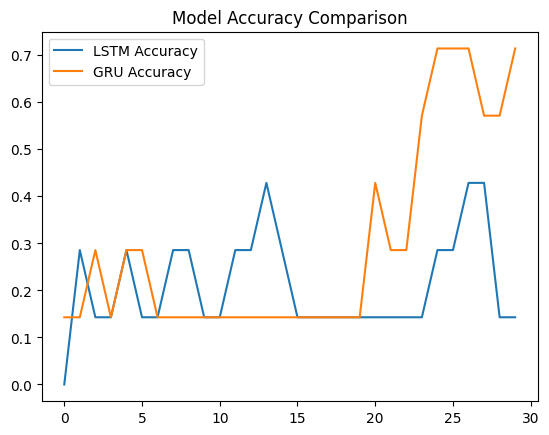

In [19]:
# 📌 Plot Training Performance

import matplotlib.pyplot as plt

plt.plot(history_lstm.history["accuracy"], label="LSTM Accuracy")
plt.plot(history_gru.history["accuracy"], label="GRU Accuracy")
plt.legend()
plt.title("Model Accuracy Comparison")
plt.show()


In [20]:
# 📌 Evaluate on Test Data

loss_lstm, accuracy_lstm = model_lstm.evaluate(X, y)
loss_gru, accuracy_gru = model_gru.evaluate(X, y)

print(f"LSTM Accuracy: {accuracy_lstm:.2f}")
print(f"GRU Accuracy: {accuracy_gru:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2222 - loss: 2.3860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7778 - loss: 2.0700
LSTM Accuracy: 0.22
GRU Accuracy: 0.78
